# [In Depth: Principal Component Analysis](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [9]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                   linewidth=2,
                   shrinkA=0,
                   shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

In [26]:
rng = np.random.RandomState()
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

[(-1.0, 1.1),
 Text(0, 0.5, 'component 2'),
 (-3.0, 3.0),
 Text(0.5, 0, 'component 1'),
 Text(0.5, 1.0, 'principal components')]

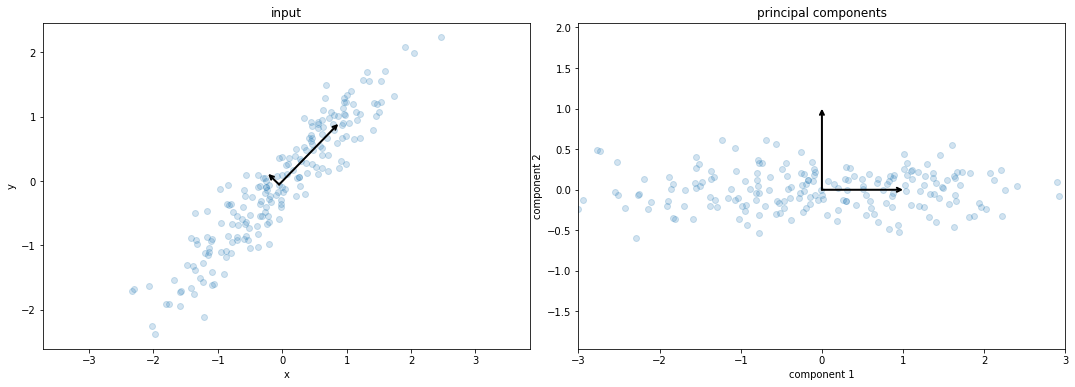

In [38]:
pca = PCA(n_components=2)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    draw_vector(pca.mean_, pca.mean_ + vector*np.sqrt(length), ax=ax[0])
ax[0].axis('equal')
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 1], ax=ax[1])
draw_vector([0, 0], [1, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2', title='principal components', xlim=(-3, 3), ylim=(-1, 1.1))

Text(1, 1, 'me')

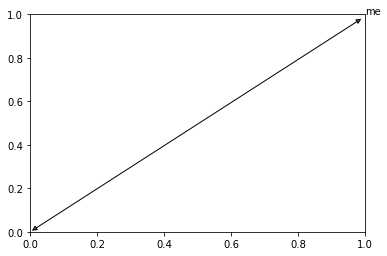

In [4]:
plt.annotate('me', [0, 0], [1,1], arrowprops=dict(arrowstyle='<|-|>'))

In [39]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:", X.shape)
print("transformed shape:", X_pca.shape)

original shape: (200, 2)
transformed shape: (200, 1)


(-2.5778457403188586, 2.706869711771095, -2.612209884170787, 2.609411731058258)

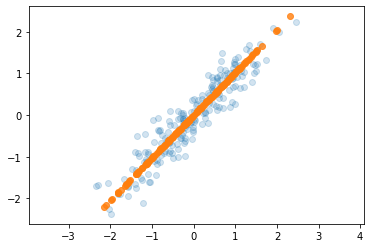

In [45]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

In [48]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [49]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


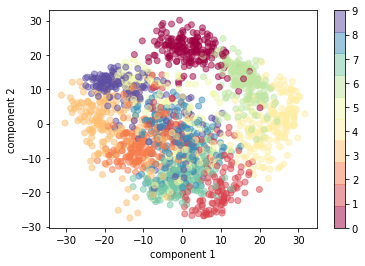

In [60]:
plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();